### Imports

In [64]:
# Importing the libraries
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime, timedelta

### Data Collection
All these files are real data collected by my USRA team which used the N5 ChemNode sensor

In [65]:
# Files
SAMPLE = './Data/sample.log'
davis2home = './Data/davis2home.txt'
davis16 = './Data/davis16.txt'
home2physicsnight = './Data/home2physicsnight.txt'
physics2stanley = './Data/physics2stanley.txt'
physics15 = './Data/physics15.txt'
stanley2davis = './Data/stanley2davis.txt'
stanely9 = './Data/stanley9.txt'
smoke = './Data/smoke.txt' # File contains data collected near smoke/fire

In [66]:
# Enter file that you want to read
df = pd.read_csv(smoke)

In [67]:
# New column headers
def parse_data(input_df, new_columns, date_experiment=(2024, 4, 17)):
    # Process
    first_row = input_df.columns
    first_row_df = first_row.to_frame().T.reset_index(drop=True)    
    input_df = pd.concat([first_row_df, input_df], ignore_index=True)
    input_df.columns = new_columns
    
    # Add a column of timestamps that are 15s intervals
    
    # Date experiment is given in year, month, day
    spacing = 15
    start_date = datetime(date_experiment[0], date_experiment[1], date_experiment[2])
    timestamps = [start_date + timedelta(seconds=i*spacing) for i in range(len(input_df))]   
    input_df.insert(loc=0, column='TimeStamp', value=timestamps)
    
    # Return
    return input_df 

In [68]:
# Creating new col names
gas_sensor = [f'GasSensor #{i} V' for i in range(1, 13)]
camera_pixels = [f'IRCamera Pixels #{i} ºC' for i in range(1, 65)]
# Combining names
new_columns = [
    *gas_sensor, 'Temperature ºC', 'Pressure Pa', 'Humidity %RH', 'Battery Charge %',
    'Net Current A', 'Tension V', 'Battery Temp ºC', 'PM 1.0 µg/m³', 'PM 2.5 µg/m³',
    'PM 4.0 µg/m³', 'PM 10.0 µg/m³', 'PM 1.0 1/cm³', 'PM 2.5 1/cm³', 'PM 4.0 1/cm³',
    'PM 10.0 1/cm³', 'PM Typ Size µm', 'CO2 ppm', 'Station ID', 'msg counter',
    *camera_pixels, 'Packt CheckSum'
]

PM_list = ['PM 1.0 µg/m³', 'PM 2.5 µg/m³', 'PM 4.0 µg/m³', 'PM 10.0 µg/m³', 'PM 1.0 1/cm³', 'PM 2.5 1/cm³', 'PM 4.0 1/cm³', 'PM 10.0 1/cm³']

df = parse_data(df, new_columns, (2024, 3, 11))

# Exploratory Data Analysis

### Viewing the data

In [69]:
df.head()

,TimeStamp,GasSensor #1 V,GasSensor #2 V,GasSensor #3 V,GasSensor #4 V,GasSensor #5 V,GasSensor #6 V,GasSensor #7 V,GasSensor #8 V,GasSensor #9 V,...,IRCamera Pixels #56 ºC,IRCamera Pixels #57 ºC,IRCamera Pixels #58 ºC,IRCamera Pixels #59 ºC,IRCamera Pixels #60 ºC,IRCamera Pixels #61 ºC,IRCamera Pixels #62 ºC,IRCamera Pixels #63 ºC,IRCamera Pixels #64 ºC,Packt CheckSum
0,2024-03-11 00:00:00,-0.627868,0.593442,0.485712,-0.305120,0.542583,-0.384836,0.566533,-0.227468,0.483311,...,22.2,24.15,23.32,23.33,23.34,23.35,23.36,23.37,23.38,15
1,2024-03-11 00:00:15,-0.627801,0.593234,0.485539,-0.305303,0.542935,-0.384302,0.566425,-0.22787,0.482949,...,23,23,23,23,23,24,23,23,23,49
2,2024-03-11 00:00:30,-0.628002,0.593302,0.485232,-0.305213,0.542238,-0.384379,0.566482,-0.227698,0.48208,...,23,28,26,23,24,23,23,23,23,160
3,2024-03-11 00:00:45,-0.627884,0.594145,0.484838,-0.305223,0.542491,-0.384024,0.566316,-0.228236,0.481643,...,25,23,23,23,23,24,25,28,27,215
4,2024-03-11 00:01:00,-0.628112,0.59394,0.484966,-0.305274,0.541627,-0.383906,0.56666,-0.227331,0.482106,...,23,23,24,24,26,25,24,24,24,41


In [70]:
df.tail()

,TimeStamp,GasSensor #1 V,GasSensor #2 V,GasSensor #3 V,GasSensor #4 V,GasSensor #5 V,GasSensor #6 V,GasSensor #7 V,GasSensor #8 V,GasSensor #9 V,...,IRCamera Pixels #56 ºC,IRCamera Pixels #57 ºC,IRCamera Pixels #58 ºC,IRCamera Pixels #59 ºC,IRCamera Pixels #60 ºC,IRCamera Pixels #61 ºC,IRCamera Pixels #62 ºC,IRCamera Pixels #63 ºC,IRCamera Pixels #64 ºC,Packt CheckSum
11,2024-03-11 00:02:45,-0.629325,0.597609,0.484561,-0.30399,0.540627,-0.382387,0.565255,-0.225713,0.482395,...,0,0,0,-20,32,0,0,-56,0,89
12,2024-03-11 00:03:00,-0.62907,0.596453,0.484584,-0.303744,0.539495,-0.381873,0.565317,-0.226887,0.481342,...,33,31,31,32,32,32,33,33,33,234
13,2024-03-11 00:03:15,-0.629342,0.595391,0.484673,-0.304194,0.539792,-0.381688,0.56543,-0.226258,0.480902,...,31,25,29,30,31,31,31,31,31,169
14,2024-03-11 00:03:30,-0.628982,0.595137,0.484616,-0.304163,0.539839,-0.381555,0.56517,-0.226048,0.480244,...,29,23,24,25,29,29,30,28,26,159
15,2024-03-11 00:03:45,-0.628831,0.59635,0.484087,-0.303923,0.539979,-0.381095,0.565092,-0.225862,0.479561,...,24,24,24,24,25,24,24,24,25,248


In [71]:
df.iloc[:, 1:].describe().transpose()

,count,unique,top,freq
GasSensor #1 V,16,16,-0.627868,1
GasSensor #2 V,16,16,0.593442,1
GasSensor #3 V,16.0,15.0,0.484616,2.0
GasSensor #4 V,16,16,-0.305120,1
GasSensor #5 V,16,16,0.542583,1
...,...,...,...,...
IRCamera Pixels #61 ºC,16,9,24,3
IRCamera Pixels #62 ºC,16,10,25,3
IRCamera Pixels #63 ºC,16,9,28,3
IRCamera Pixels #64 ºC,16,10,30,5


In [72]:
print(f'Width: {df.shape[0]}')
print(f'Height: {df.shape[1]}')

Width: 16
Height: 97


In [73]:
# Summary statistics for all the particulate matter
def summary_stats_item(pm):
    split_input = pm.split(' ')
    units = split_input[-1]
    numeric = pd.to_numeric(df[pm]) # handle the case where 
    
    print(f'Statistics for {pm}:')
    print(f'Mean: {numeric.mean():.3f} {units}')
    print(f'Minimum: {numeric.min():.3f} {units}')
    print(f'Quartile #1: {numeric.quantile(.25):.3f} {units}')
    print(f'Median: {numeric.median():.3f} {units}')
    print(f'Quartile #3: {numeric.quantile(.75):.3f} {units}')
    print(f'Maximum: {numeric.max():.3f} {units}')
    print(f'Standard Deviation: {numeric.std():.3f} {units}')
    print()

In [74]:
def summarize_important_parameters():
    [summary_stats_item(pm) for pm in PM_list]

In [75]:
# Summary statistics of the particular matter
summarize_important_parameters()

Statistics for PM 1.0 µg/m³:
Mean: 2644.000 µg/m³
Minimum: 182.000 µg/m³
Quartile #1: 905.000 µg/m³
Median: 2747.500 µg/m³
Quartile #3: 3922.250 µg/m³
Maximum: 5776.000 µg/m³
Standard Deviation: 1912.676 µg/m³

Statistics for PM 2.5 µg/m³:
Mean: 3588.188 µg/m³
Minimum: 210.000 µg/m³
Quartile #1: 962.000 µg/m³
Median: 3235.500 µg/m³
Quartile #3: 5152.750 µg/m³
Maximum: 9473.000 µg/m³
Standard Deviation: 3062.111 µg/m³

Statistics for PM 4.0 µg/m³:
Mean: 4245.438 µg/m³
Minimum: 224.000 µg/m³
Quartile #1: 965.750 µg/m³
Median: 3342.500 µg/m³
Quartile #3: 6051.000 µg/m³
Maximum: 12627.000 µg/m³
Standard Deviation: 4009.709 µg/m³

Statistics for PM 10.0 µg/m³:
Mean: 4551.000 µg/m³
Minimum: 231.000 µg/m³
Quartile #1: 967.250 µg/m³
Median: 3391.500 µg/m³
Quartile #3: 6469.500 µg/m³
Maximum: 14093.000 µg/m³
Standard Deviation: 4461.874 µg/m³

Statistics for PM 1.0 1/cm³:
Mean: 16131.750 1/cm³
Minimum: 1200.000 1/cm³
Quartile #1: 6156.250 1/cm³
Median: 15903.000 1/cm³
Quartile #3: 25800.250 1/c

In [76]:
df.columns

Index(['TimeStamp', 'GasSensor #1 V', 'GasSensor #2 V', 'GasSensor #3 V',
       'GasSensor #4 V', 'GasSensor #5 V', 'GasSensor #6 V', 'GasSensor #7 V',
       'GasSensor #8 V', 'GasSensor #9 V', 'GasSensor #10 V',
       'GasSensor #11 V', 'GasSensor #12 V', 'Temperature ºC', 'Pressure Pa',
       'Humidity %RH', 'Battery Charge %', 'Net Current A', 'Tension V',
       'Battery Temp ºC', 'PM 1.0 µg/m³', 'PM 2.5 µg/m³', 'PM 4.0 µg/m³',
       'PM 10.0 µg/m³', 'PM 1.0 1/cm³', 'PM 2.5 1/cm³', 'PM 4.0 1/cm³',
       'PM 10.0 1/cm³', 'PM Typ Size µm', 'CO2 ppm', 'Station ID',
       'msg counter', 'IRCamera Pixels #1 ºC', 'IRCamera Pixels #2 ºC',
       'IRCamera Pixels #3 ºC', 'IRCamera Pixels #4 ºC',
       'IRCamera Pixels #5 ºC', 'IRCamera Pixels #6 ºC',
       'IRCamera Pixels #7 ºC', 'IRCamera Pixels #8 ºC',
       'IRCamera Pixels #9 ºC', 'IRCamera Pixels #10 ºC',
       'IRCamera Pixels #11 ºC', 'IRCamera Pixels #12 ºC',
       'IRCamera Pixels #13 ºC', 'IRCamera Pixels #14 ºC',
  

In [77]:
def summarize_conditions():
    pressure_mean = pd.to_numeric(df['Pressure Pa']).mean()
    temp_mean = pd.to_numeric(df['Pressure Pa']).mean()
    
    print(f'Conditions experiment was performed in:')
    print(f'Average pressure: {pressure_mean:.3f} Pa')
    print(f'Average temperature: {temp_mean:.3f} ºC')

In [78]:
summarize_conditions()

Conditions experiment was performed in:
Average pressure: 37.538 Pa
Average temperature: 37.538 ºC


### Visualizations

#### Plotting particulate matter statistics

In [79]:
def pm_boxplots():
    fig = make_subplots(rows=1, cols=8, subplot_titles=PM_list)
    
    for i, col in enumerate(PM_list, start=1):
        fig.add_trace(go.Box(y=df[col], name=col), row=1, col=i)
    
    fig.update_layout(height=500, width=1600, title_text="PM Data Box Plots")
    fig.show()

In [80]:
pm_boxplots()

#### Time Series Plotting

In [81]:
# Expected that values contains the values you want to compare w.r.t time
# Time is every 15 second intervals
# The end value is exclusive
def plot_time_series(timestamps, values, start=0, end=len(df), y_label = '', title='', width=0.5):
    # Extract time stamps
    temp_times = pd.to_datetime(timestamps)[start:end]
    values = values[start:end]
    if not all(isinstance(v, str) for v in values):
        values = values.astype(str)

    # Handles the issue with string y-axis going wrong
    high_floats = [float(x) for x in values]

    plt.figure(figsize=[15, 10])
    plt.plot(temp_times, high_floats, label=y_label, linewidth=width)

    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # Show all ticks
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) # Formatting
    plt.xticks(rotation=60)
    
    plt.title(title)
    plt.xlabel('Time[s]')
    plt.ylabel(y_label)    
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [82]:
def display_time_series(df, start=0, end=df.shape[0], width=0.5, features=df.columns[1:]):
    timestamps = df['TimeStamp']
    titles = {column: f'{column} vs Time' for column in new_columns if column != 'Station ID'}
    
    for column in features:
        if column != 'Station ID':
            values = df[column]
            title = titles.get(column, column) if titles else column
            plot_time_series(timestamps, values, start, end, y_label=column, title=title, width=width)

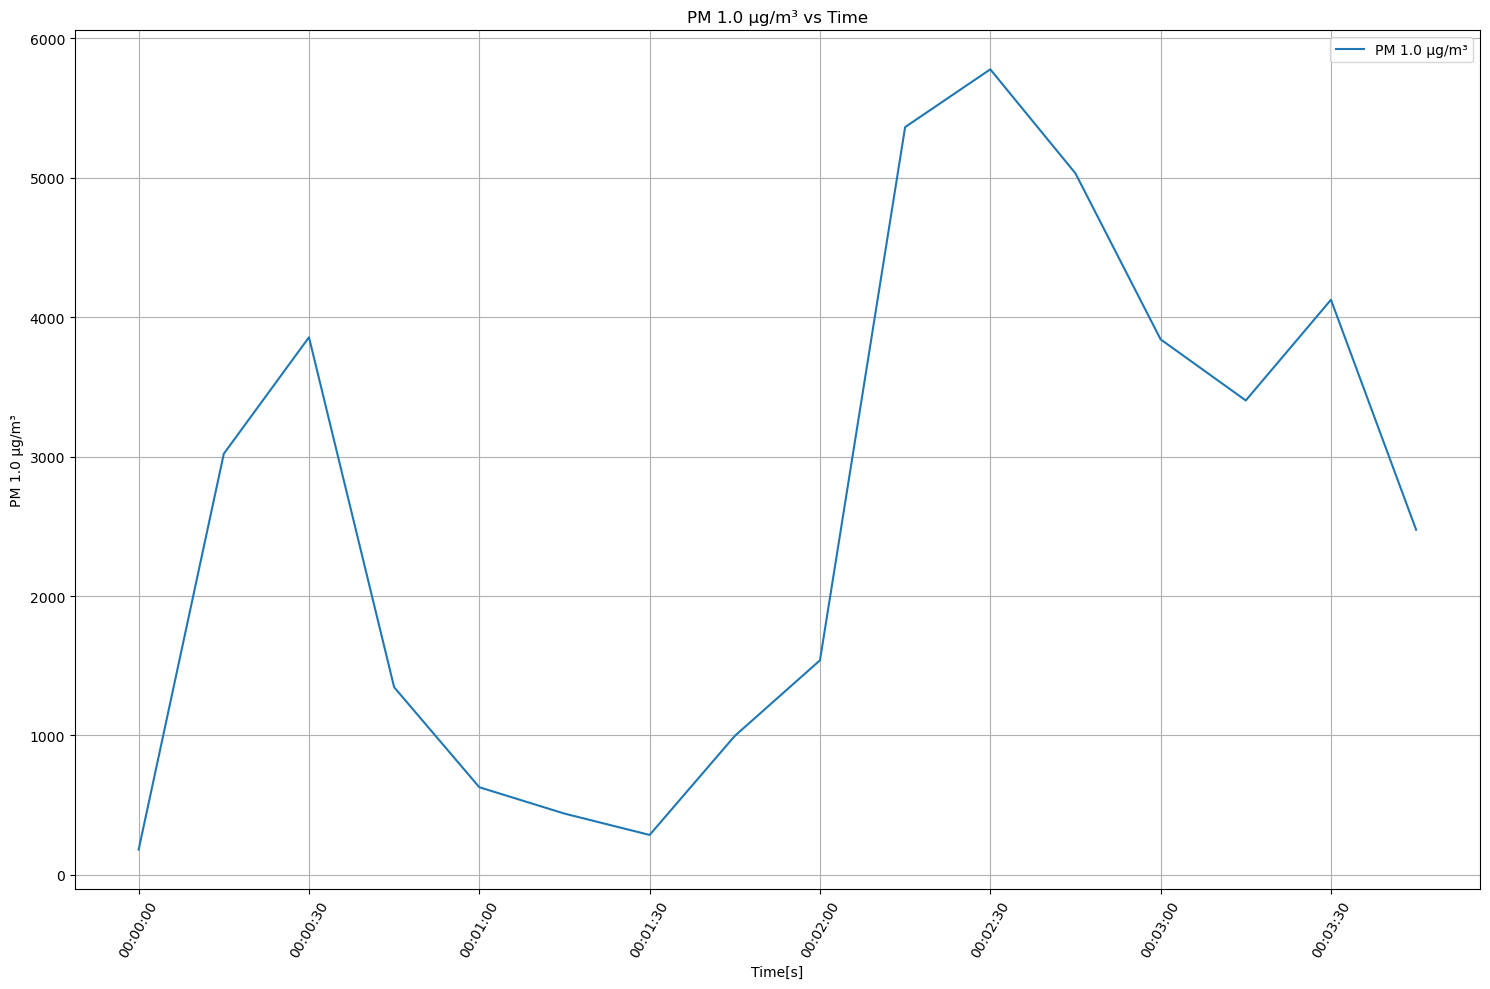

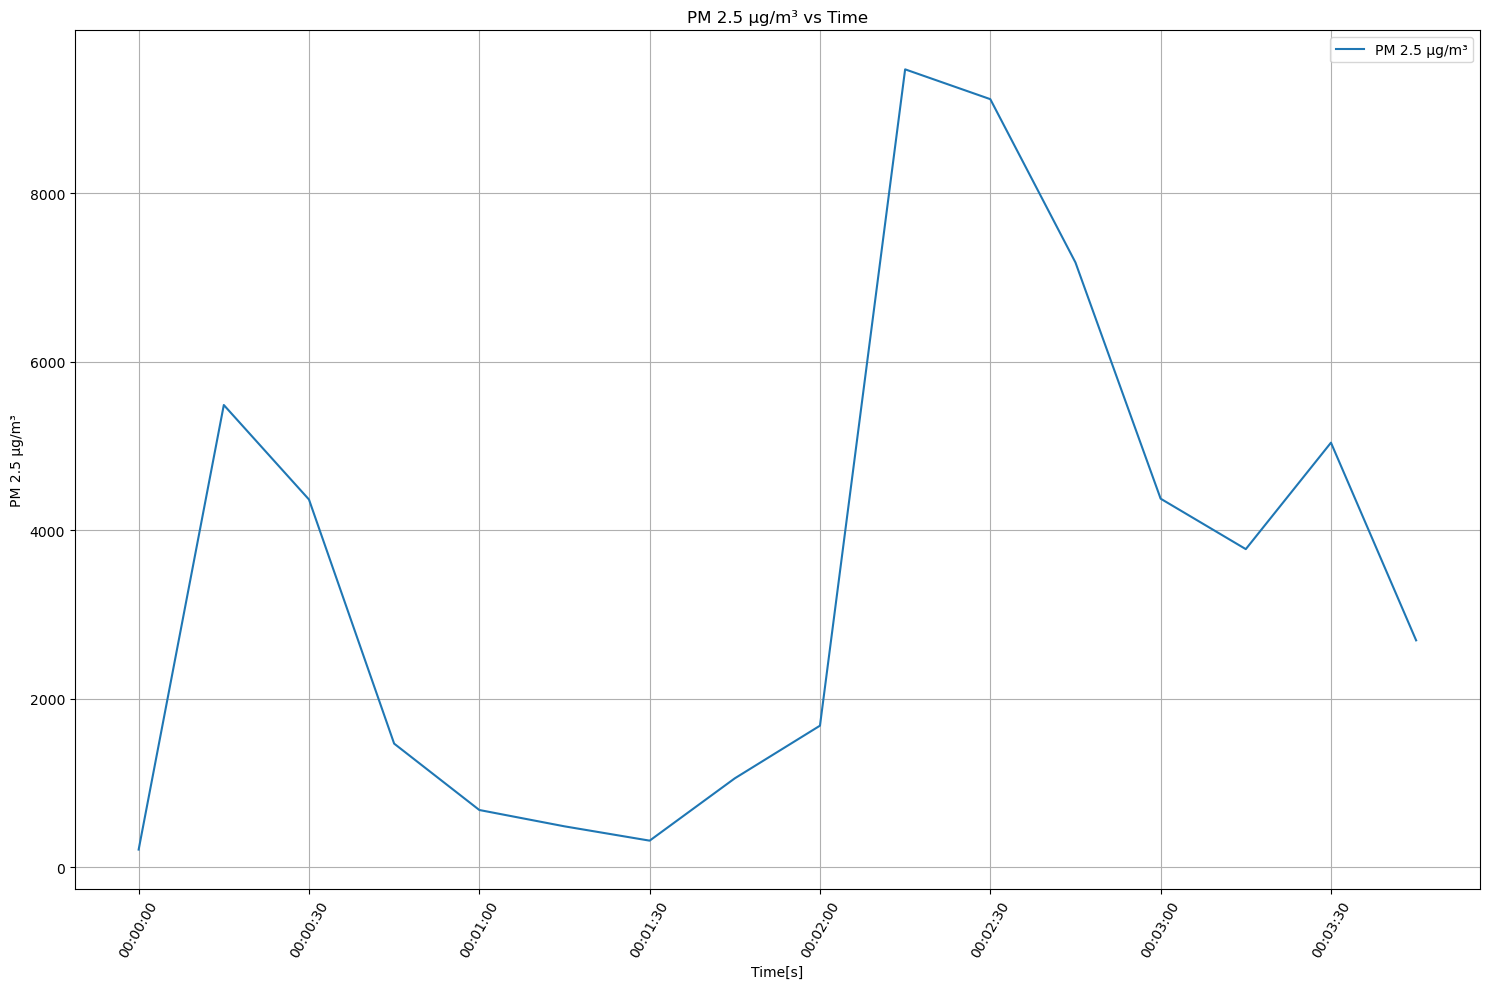

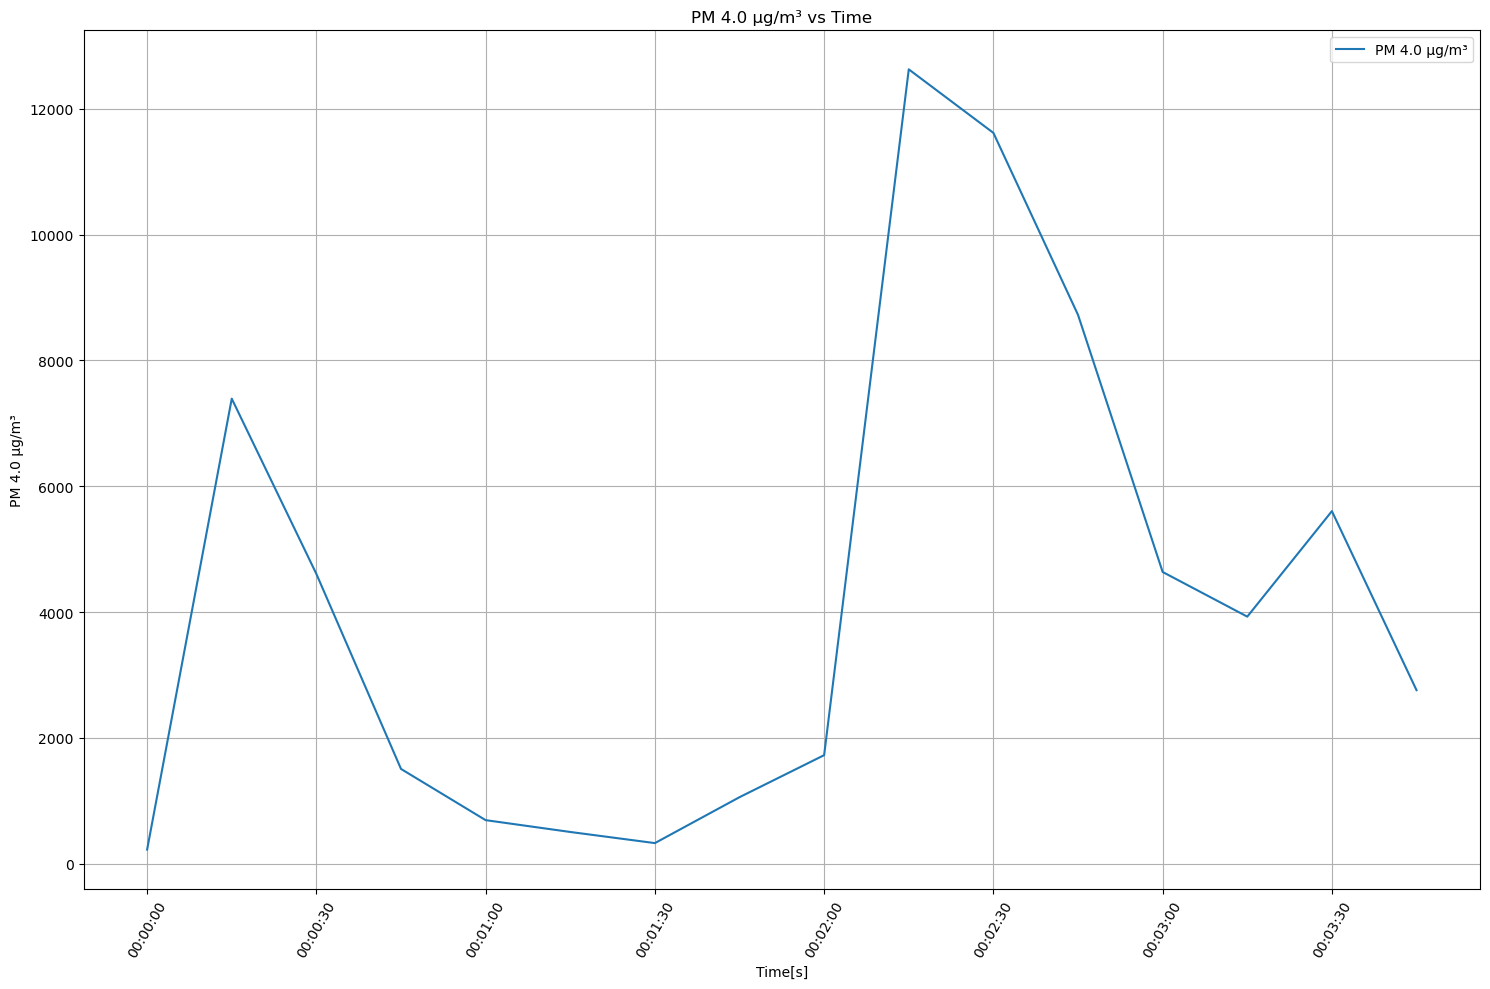

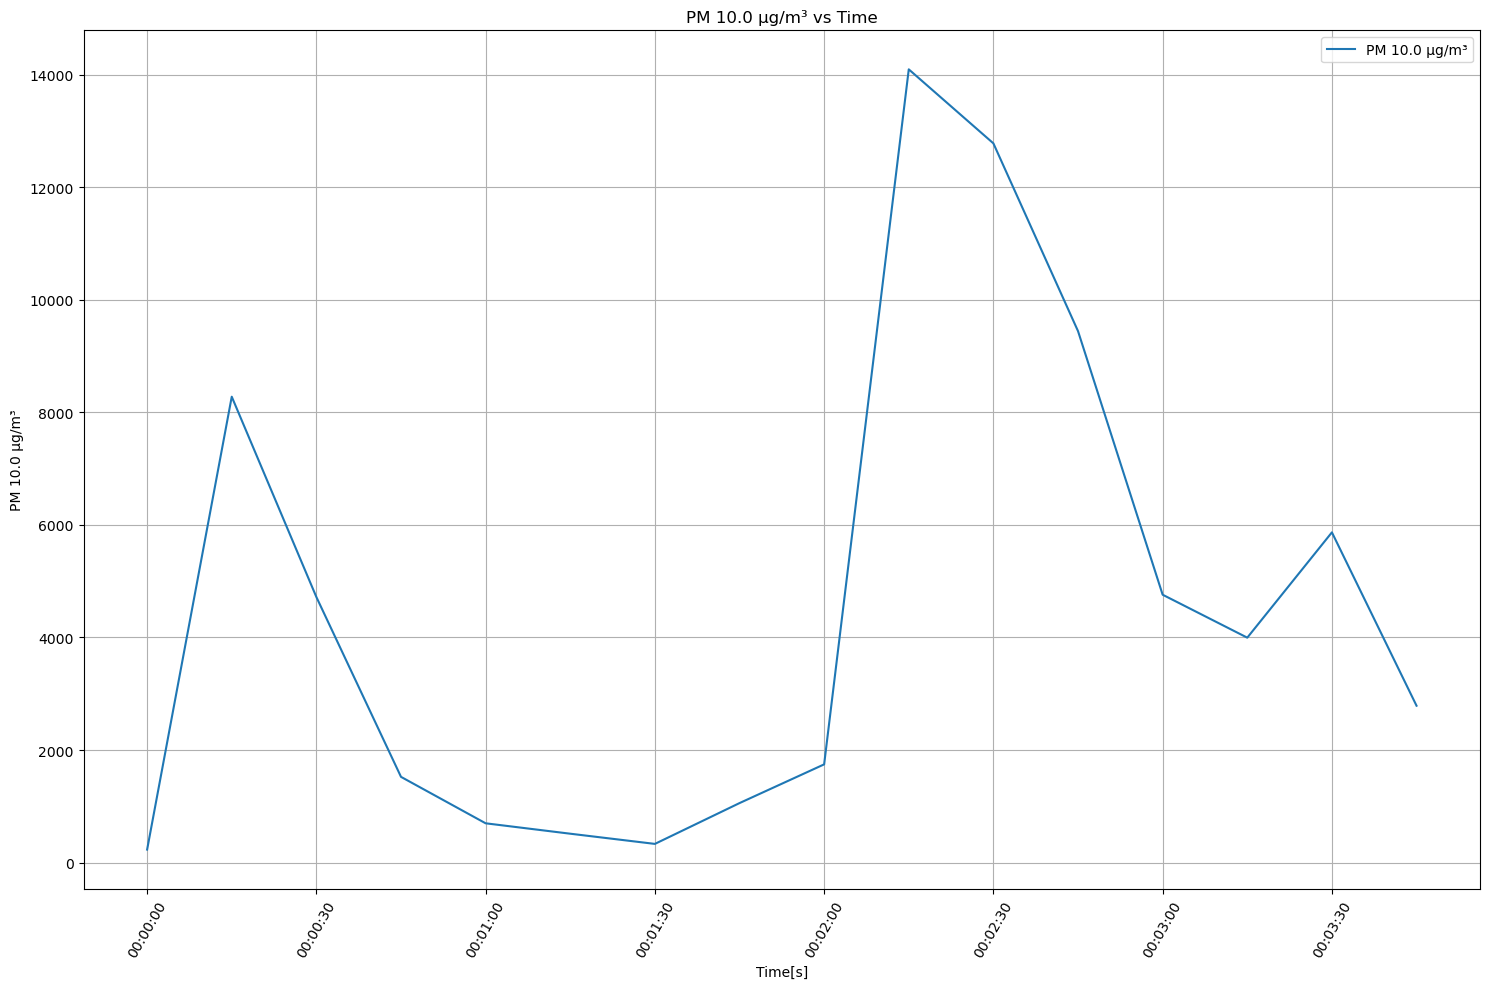

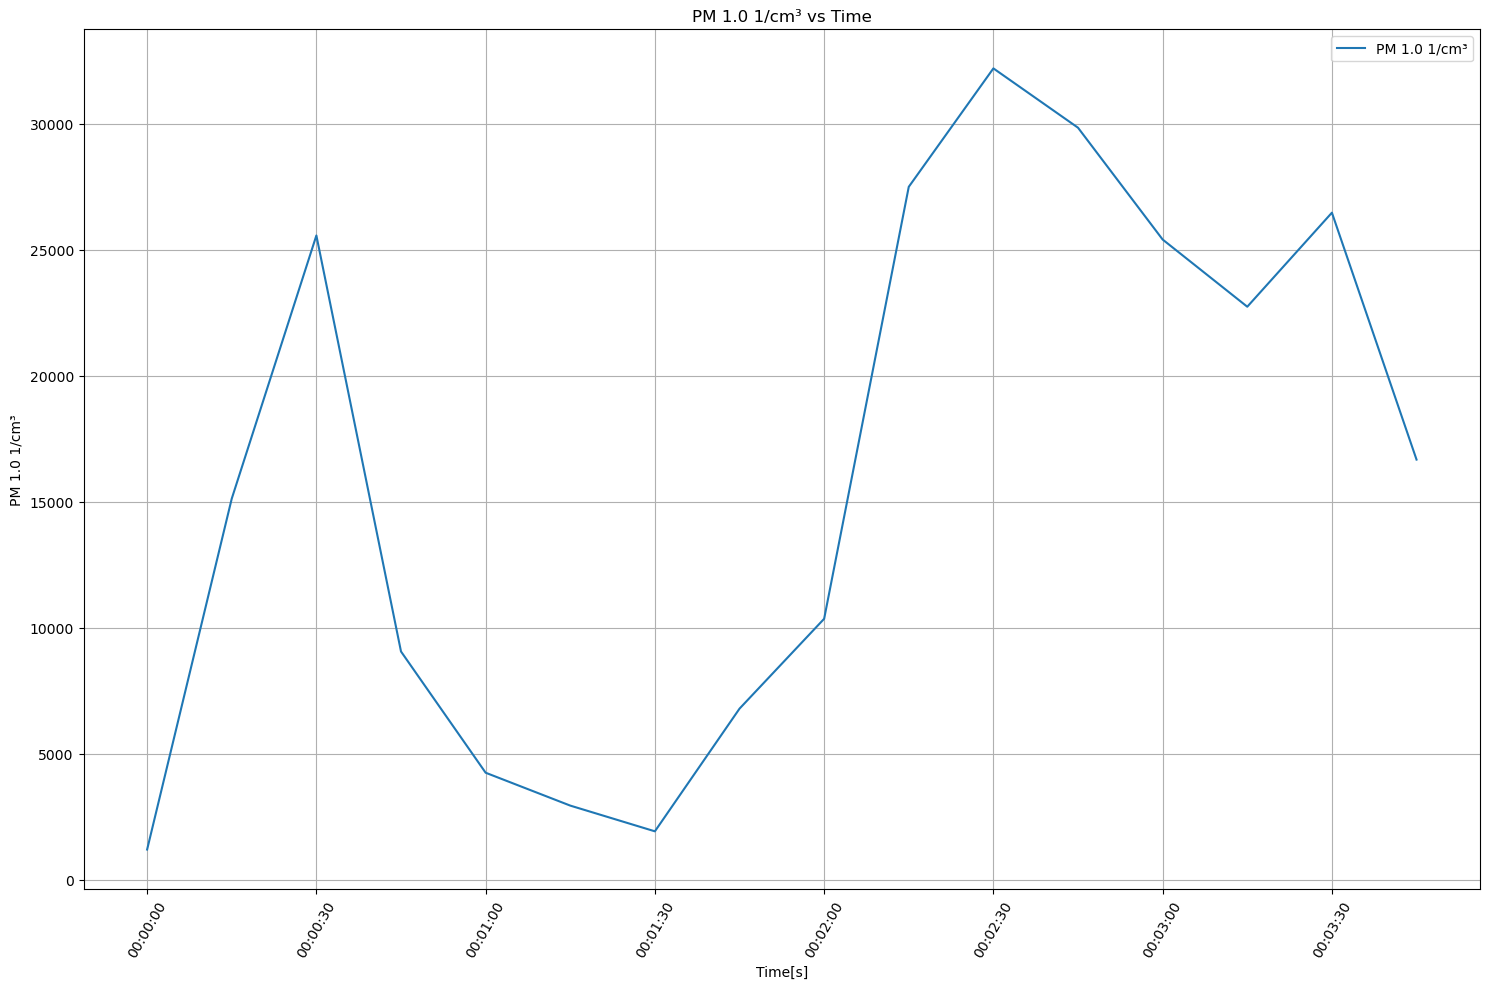

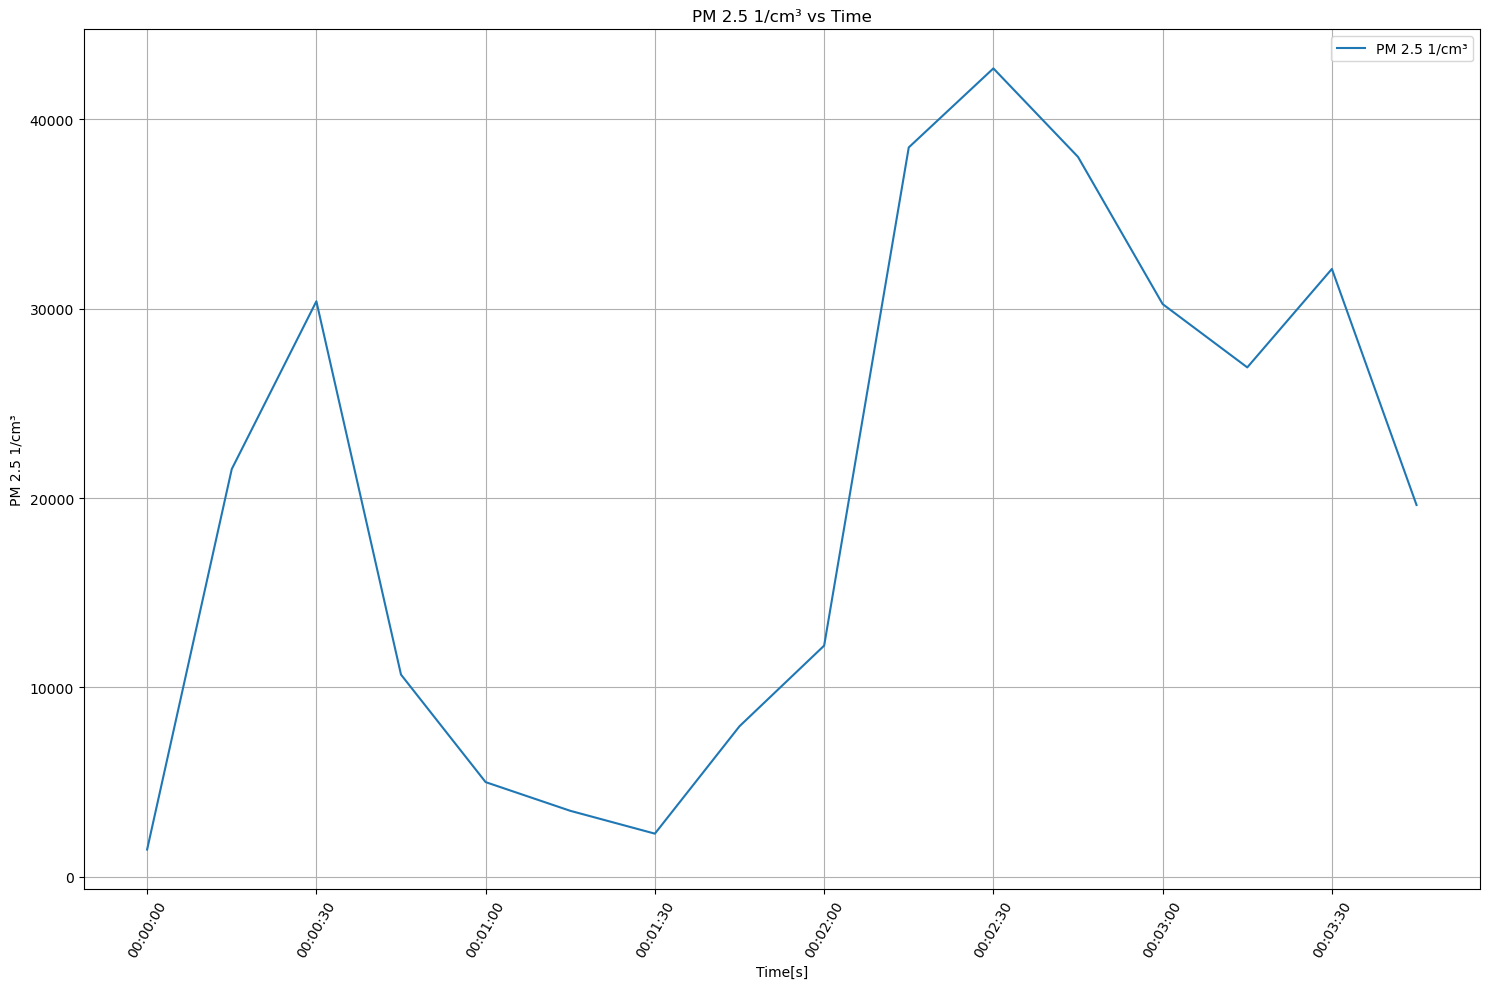

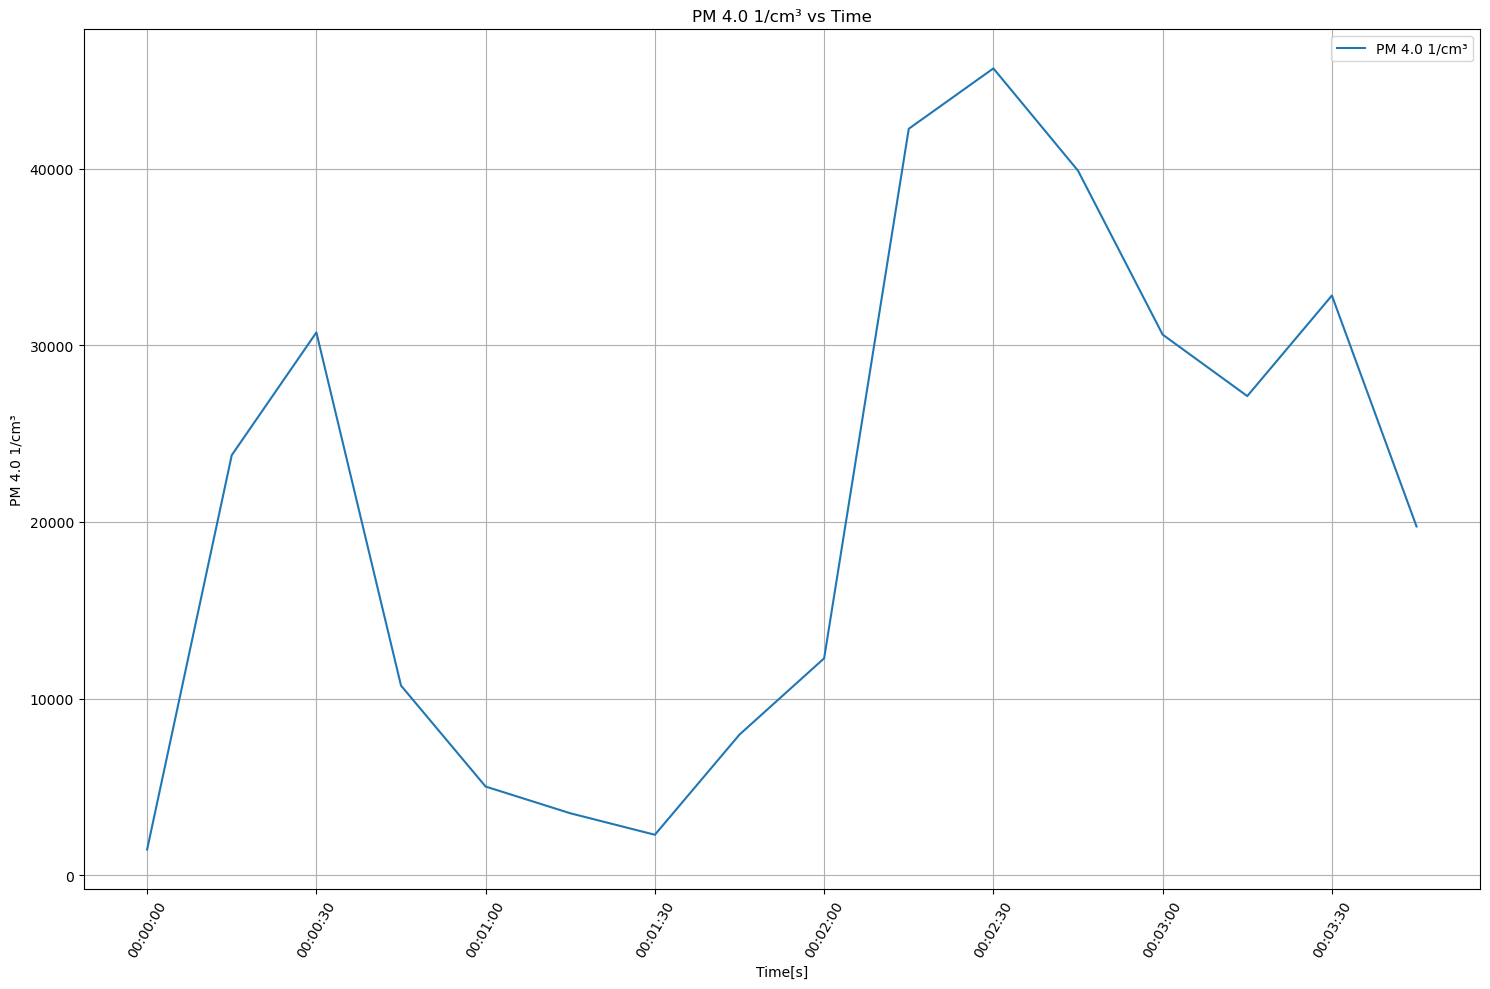

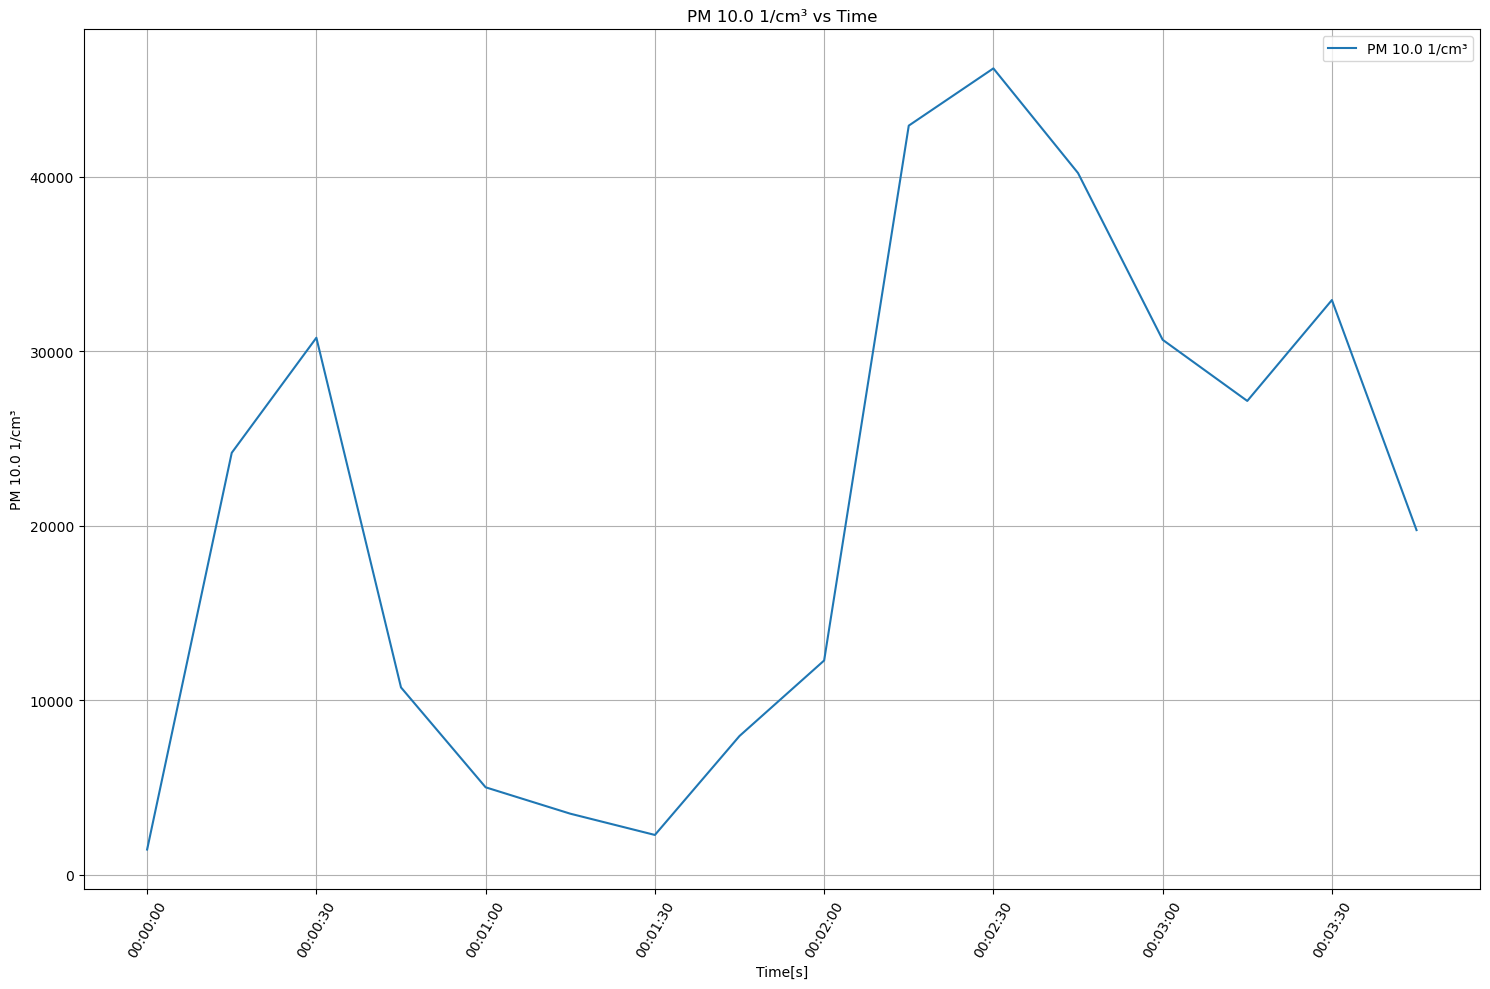

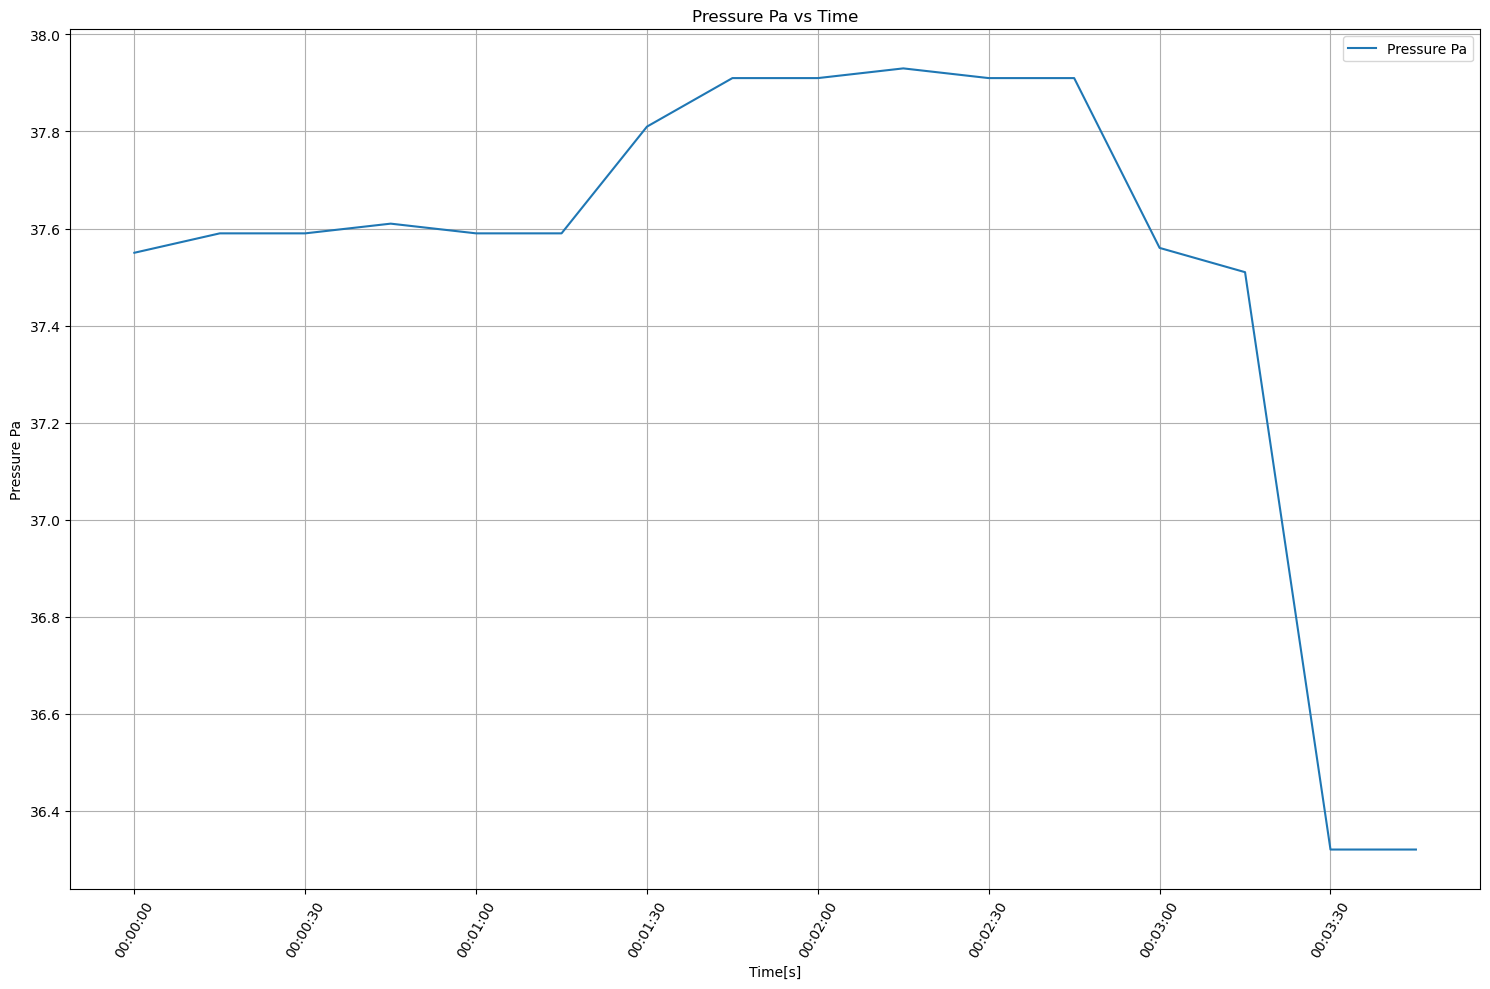

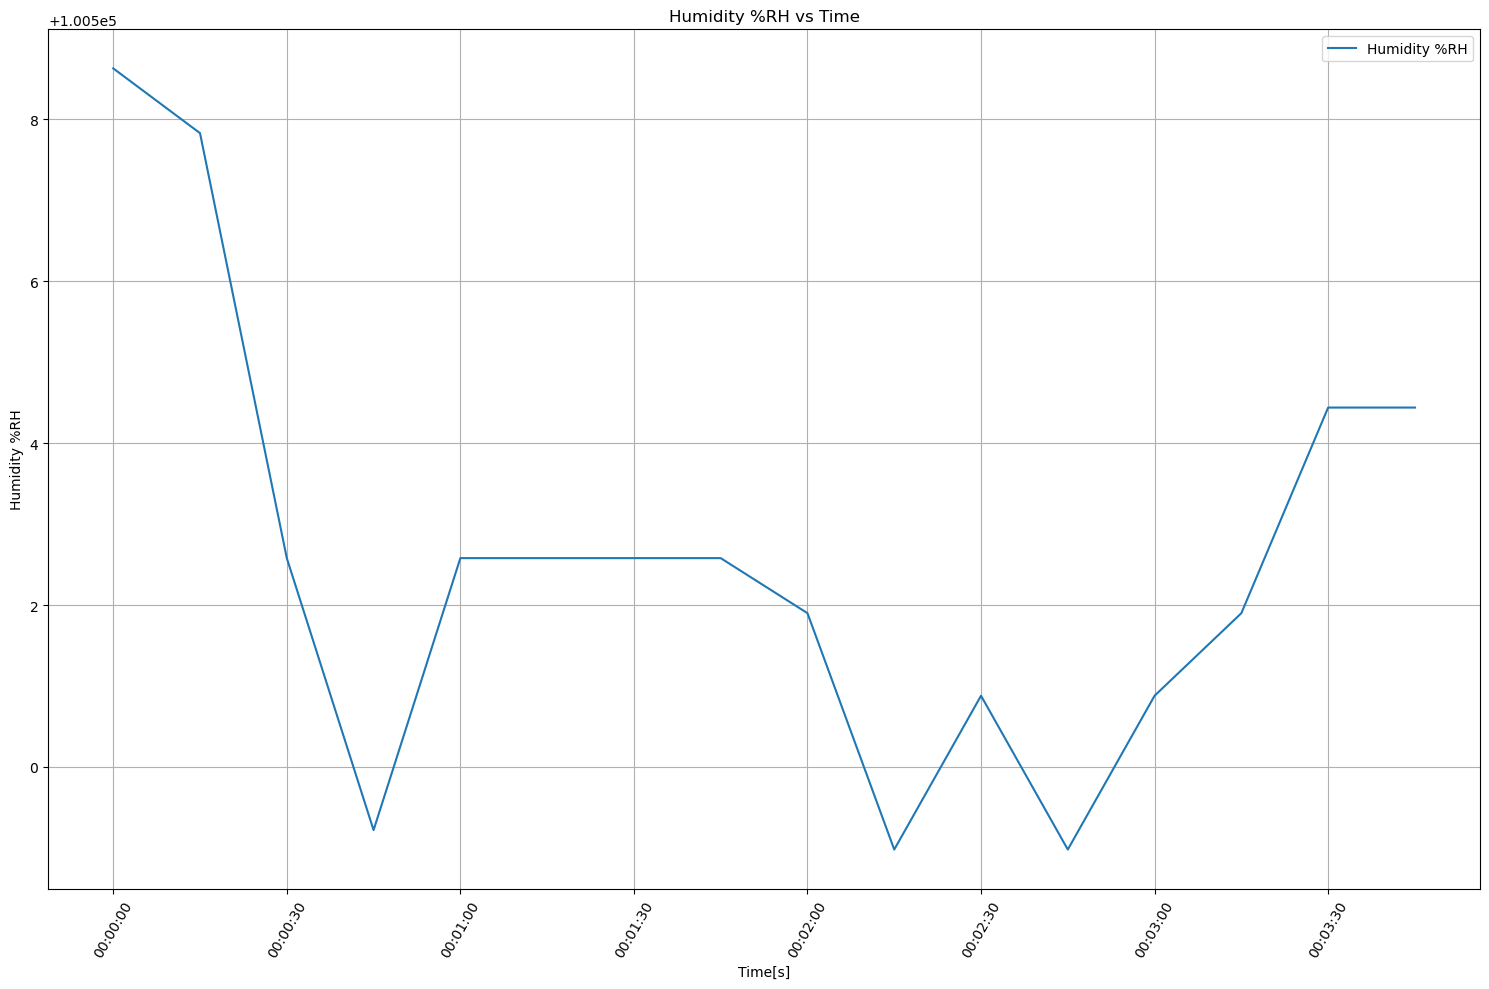

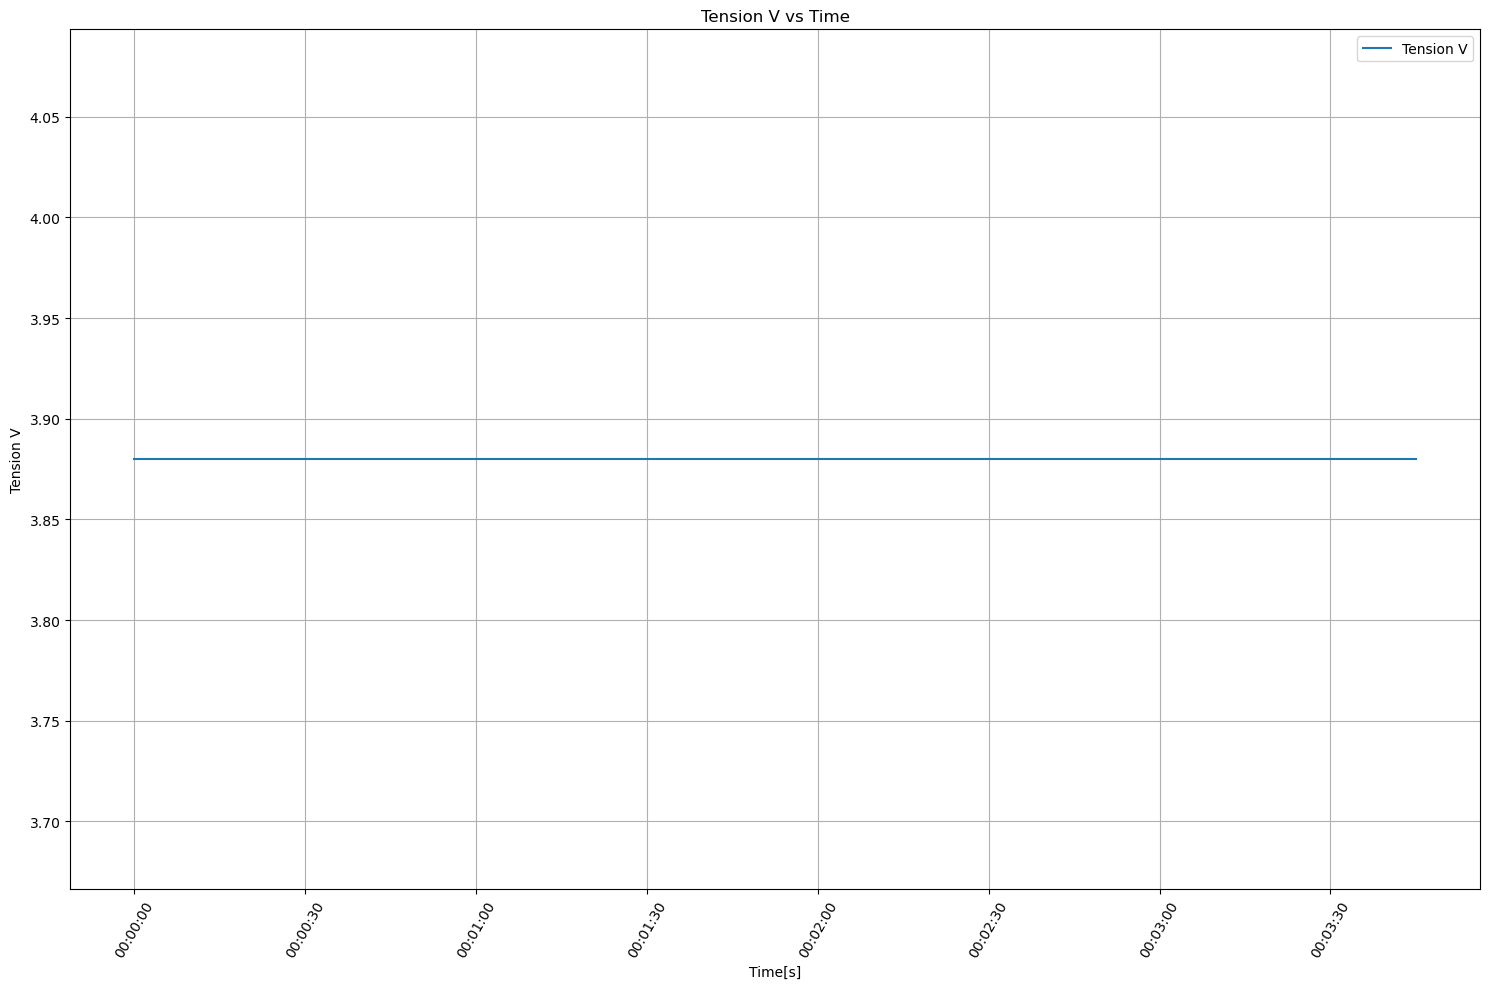

In [83]:
display_time_series(df, start=0, width=1.5, features=[*PM_list, 'Pressure Pa', 'Humidity %RH', 'Tension V'])

#### Relationship with particular matter

In [84]:
important_columns = df[PM_list]
# Create a correlation matrix
corr = important_columns.corr()
# Create an interactive heatmap
fig = px.imshow(corr, labels=dict(x="Columns", y="Columns", color="Correlation"),
                x=corr.columns, y=corr.columns, color_continuous_scale='Blues')
# Adjust title
fig.update_layout(title='Interactive Correlation Heatmap of PM', width=600, height=700, xaxis_tickangle=-60)
fig.show()